# Relatório Telco_Vista V.01






In [1]:
# import numpy as np 
import matplotlib.pyplot as plt
from Arrays.arrays import Arrays
import pandas as pd 
import seaborn as sns
from pylab import rcParams
import numpy as np
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
rcParams['figure.figsize']=5,4
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier



In [3]:
#Entrada dos dados que estão disponibilizados em: https://www.kaggle.com/blastchar/telco-customer-churn/data

dados=pd.read_csv(r"C:\Users\ana.m.lima\dados\churn.csv")
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Introdução

A regressão logística é um método de regressão bastante útil para resolver problemas de classificação binária. Regressão logística é um dos algoritmos de aprendizagem de máquina mais simples e comumente usados para classificação de duas classes. O objetivo é criar um modelo simples e eficaz. Modelos complexos não possuem resultados eficientes de acordo com o Ockham´s razor. Portanto, Quanto menos complexo é o modelo, mais provável é que um bom resultado empírico não se deva às peculiaridades da amostra. 

Antes de começar qualquer projeto de Machine Learning temos que levar em consideração fazer uma análise detalhada dos nossos dados pois isso é de extrema importância. Esse passo envolve processos, por exemplo: 
- 1- Verificar como os dados estão divididos e quais são as features que vamos utilizar na construção do modelo; 
- 2- Realizar a visualização dos dados usando histogramas ou gráficos de dispersão entre outras métricas de classificação; 
- 3- Incorporar nos dados One-hot-enconding; 
- 4- Tirar qualquer tipo de Outilier; 
- 5- Detectar valores omitidos, valores duplicados; 
- 6- Label incoerente; 

Este relatório foi produzido no âmbinto de investigação no projeto Telco-Vista e será uma combinação de programação, análise de dados e aprendizado de máquina.

O objetivo deste respectivo modelo predition de Machine Learning é identificar qual a taxa de clientes que vão cometer churn rate que ocorre quando um cliente abandona a operadora. Como podemos observar temos um problema que envolve probabilidade, logo um valor entre 0 e 1.Em machine Learnig esse problema se dá o nome de Regressão Logística. 

O conjunto de dados que estou usando é referente a uma empresa de Telecomunicação. Nesses dados temos as seguintes informações: 
- Informações sobre os clientes, se tem dependentes ou parceiros; 
- Tipo de contrato 
- Se usa serviço de telefone 
- Valor que paga mensalmente 

Algumas features apresentam relação com o tempo de contratação do serviço, como tenure, TotalCharge e MonthlyCharges. Essas significam respectivamente, tempo, em meses, que o cliente possui o serviço pago. 



In [4]:
#obtendo valores diferentes
dados.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
dados.shape

(7043, 21)

In [6]:
dados.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Como foi possivel observar a tabela "TotalCharges"  está no formato "object", o ideal é transformar isso para o tipo de dado "float"

In [2]:
#Filtrando features

cols_to_use= [ 'customerID', 'gender', 'Partner', 'PhoneService', 'MultipleLines', 'OnlineSecurity','InternetService',
                'OnlineBackup','Contract', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling','PaymentMethod', 'tenure', 'TotalCharges', 'MonthlyCharges', 'Churn']

dados=dados[cols_to_use]
dados.head()

NameError: name 'dados' is not defined

In [8]:
dados['customerID'] = np.random.randint(0,7044, size=len(dados))

In [9]:
dados.head(10)

,customerID,gender,Partner,PhoneService,MultipleLines,OnlineSecurity,InternetService,OnlineBackup,Contract,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,tenure,TotalCharges,MonthlyCharges,Churn
0,4269,Female,Yes,No,No phone service,No,DSL,Yes,Month-to-month,No,No,No,No,Yes,Electronic check,1,29.85,29.85,No
1,3548,Male,No,Yes,No,Yes,DSL,No,One year,Yes,No,No,No,No,Mailed check,34,1889.5,56.95,No
2,3953,Male,No,Yes,No,Yes,DSL,Yes,Month-to-month,No,No,No,No,Yes,Mailed check,2,108.15,53.85,Yes
3,227,Male,No,No,No phone service,Yes,DSL,No,One year,Yes,Yes,No,No,No,Bank transfer (automatic),45,1840.75,42.30,No
4,6806,Female,No,Yes,No,No,Fiber optic,No,Month-to-month,No,No,No,No,Yes,Electronic check,2,151.65,70.70,Yes
5,6574,Female,No,Yes,Yes,No,Fiber optic,No,Month-to-month,Yes,No,Yes,Yes,Yes,Electronic check,8,820.5,99.65,Yes
6,1022,Male,No,Yes,Yes,No,Fiber optic,Yes,Month-to-month,No,No,Yes,No,Yes,Credit card (automatic),22,1949.4,89.10,No
7,5189,Female,No,No,No phone service,Yes,DSL,No,Month-to-month,No,No,No,No,No,Mailed check,10,301.9,29.75,No
8,5947,Female,Yes,Yes,Yes,No,Fiber optic,No,Month-to-month,Yes,Yes,Yes,Yes,Yes,Electronic check,28,3046.05,104.80,Yes
9,3809,Male,No,Yes,No,Yes,DSL,Yes,One year,No,No,No,No,No,Bank transfer (automatic),62,3487.95,56.15,No


In [10]:
#Verificando valores que podem está faltando na tabela Churn
dados.isna().sum()

customerID          0
gender              0
Partner             0
PhoneService        0
MultipleLines       0
OnlineSecurity      0
InternetService     0
OnlineBackup        0
Contract            0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
tenure              0
TotalCharges        0
MonthlyCharges      0
Churn               0
dtype: int64

In [11]:
def to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan
    
# convertendo os valores utilizando a função

df_clean = dados.copy()
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(to_float)

In [12]:
#analisando se existe algum valor que não é numerico 
df_clean['TotalCharges'].isnull().sum()

11

In [13]:
#salvando a mediana da coluna Totalcharges
totalChargesMedia=df_clean['TotalCharges'].median()

#preenchendo os valores não numericos com a mediana 
df_clean['TotalCharges'].fillna(totalChargesMedia, inplace=True)

In [14]:
df_clean.head()

,customerID,gender,Partner,PhoneService,MultipleLines,OnlineSecurity,InternetService,OnlineBackup,Contract,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,tenure,TotalCharges,MonthlyCharges,Churn
0,4269,Female,Yes,No,No phone service,No,DSL,Yes,Month-to-month,No,No,No,No,Yes,Electronic check,1,29.85,29.85,No
1,3548,Male,No,Yes,No,Yes,DSL,No,One year,Yes,No,No,No,No,Mailed check,34,1889.50,56.95,No
2,3953,Male,No,Yes,No,Yes,DSL,Yes,Month-to-month,No,No,No,No,Yes,Mailed check,2,108.15,53.85,Yes
3,227,Male,No,No,No phone service,Yes,DSL,No,One year,Yes,Yes,No,No,No,Bank transfer (automatic),45,1840.75,42.30,No
4,6806,Female,No,Yes,No,No,Fiber optic,No,Month-to-month,No,No,No,No,Yes,Electronic check,2,151.65,70.70,Yes


In [15]:
#Substituindo 'No internet service' por 'No' das colunas OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

col_nomes = ['OnlineSecurity', \
             'OnlineBackup', \
             'DeviceProtection', \
             'TechSupport', \
             'StreamingTV', \
             'StreamingMovies']

for i in col_nomes:
    df_clean[i] = df_clean[i].replace({'No internet service' : 'No'})



Plotagem do histograma que é um grafico de frequência e nele é mostrado a variação sobre uma faixa específica. Eles descrevem a frequência com que variam os processos e a forma de distribuição dos dados como um todo. Nesta plotagem vamos avaliar a feature "tenure" que é referente ao número de meses que o cliente contratou o serviço.

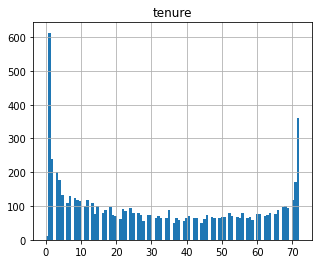

In [16]:

dados.hist(column="tenure", bins=100)
plt.show(90,45)

Com base nas imformações analisadas no histograma é criada uma função de faixa temporal onde o output será tranformada em uma nova feature com as faixas temporais de permanência no serviço. 

In [17]:
#criação de uma função para classificação do número de meses que o cliente adquiriu o serviço

def set_tempo_contrato(v):
    if (v <=12):
        return 'contract_0-12'
    elif (v>12) and (v<=24):
        return 'contract_13-24'
    elif (v>24) and (v<=48):
        return 'contract_25-48'
    elif (v>48) and (v<=60):
        return 'contract_49-60'
    elif (v>60):
        return 'contract_60'

In [18]:
#criando uma nova coluna com os valores de faixas temporais
df_clean['contract_faixa'] = df_clean['tenure'].apply(set_tempo_contrato)


Como já sabemos este problema é de Regressão Logistíca, logo os dados são compostos principalmente por variáveis binárias ou de tipo categorico. Partindo desse pressuposto temos que verificar se em nossos dados a indicios de outliers. Vamos verificar se algum valor foge da normalidade e que se não tratado pode causar anomalias nos resultados que serão obtidos.

In [19]:
#imprimeindo os dados sem outliers
df_clean.describe()

,customerID,tenure,TotalCharges,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3513.050547,32.371149,2281.916928,64.761692
std,2059.918010,24.559481,2265.270398,30.090047
min,0.000000,0.000000,18.800000,18.250000
25%,1703.500000,9.000000,402.225000,35.500000
50%,3530.000000,29.000000,1397.475000,70.350000
75%,5316.000000,55.000000,3786.600000,89.850000
max,7043.000000,72.000000,8684.800000,118.750000


Para ter a certeza que os outiliers não estão presente no nossos dados, vou realizar o cálculo matemático entre o primeiro e terceiro quartil. Esse cálculo é aplicado para as colunas "TotalCharges" e "MonthlyCharges"

8863.1625
-4674.3375


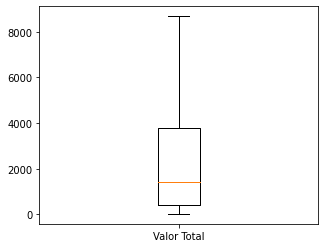

In [20]:
#Outliers é um dado que se encontra fora do padrão global de uma distribuíção 
#O calculo do IQR x 1.5 é feito para excluir qulquer ruído de dados 

df_clean["TotalCharges"].astype(float)
Q1 = df_clean['TotalCharges'].quantile(q=0.25)
Q3 = df_clean['TotalCharges'].quantile(q=0.75)

IQR=Q3-Q1 #mediana
filtered = df_clean.query('(@Q1 - 1.5 * @IQR) <= TotalCharges <= (@Q3 + 1.5 * @IQR)')
df_clean.join(filtered, rsuffix='filtered')
plt.boxplot(df_clean['TotalCharges'], labels=['Valor Total']);

#Para visualizar com precisão os valores do limite superior e do limite inferior 
#utilizei a constante de 1.5 pois é o valor comumente usado
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)



171.375
-46.02499999999999


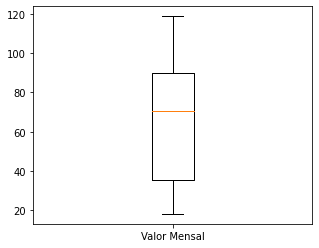

In [21]:

df_clean["MonthlyCharges"].astype(float)
Q1 = df_clean['MonthlyCharges'].quantile(q=0.25)
Q3 = df_clean['MonthlyCharges'].quantile(q=0.75)

IQR=Q3-Q1 #mediana
filtered = df_clean.query('(@Q1 - 1.5 * @IQR) <= MonthlyCharges <= (@Q3 + 1.5 * @IQR)')
df_clean.join(filtered, rsuffix='_filtered')
plt.boxplot(df_clean['MonthlyCharges'], labels=['Valor Mensal']);


#Para visualizar com precisão os valor
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)


# Pré-processamento dos Dados 

Para um engenheiro de Machine Learning é de extrema importância realizar: 
- Visualização;
- Depuração;
- Monitorização. 

Esses são passos importantes para preparar os dados para o modelo ML que será desenvolvido e assim poder obter bons resultados. Além de serem consideradas boas práticas na aprendizagem de máquina. Pois em nosso dados pode haver peculiaridades. Essa parte do processamento serve para conhecer melhor os dados e entender como está sendo a sua distribuição. 

 

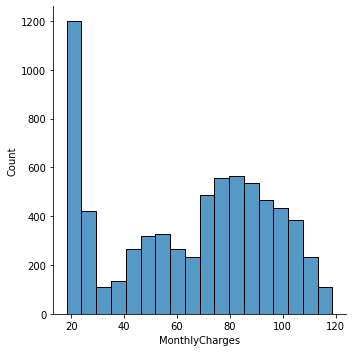

In [22]:
#Gerando um gráfico de distrinuição dos valores pagos mensalmente por todos os clientes.
sns.displot(df_clean.MonthlyCharges)

Gerando gráfico de distribuição de todos os valores pagos pelos clientes 

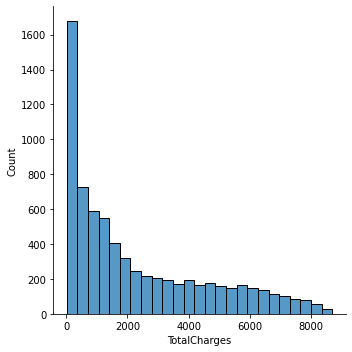

In [23]:
sns.displot(df_clean.TotalCharges)

Plotando grafico de barras com faixas temporais de permanência de serviço (tenure)

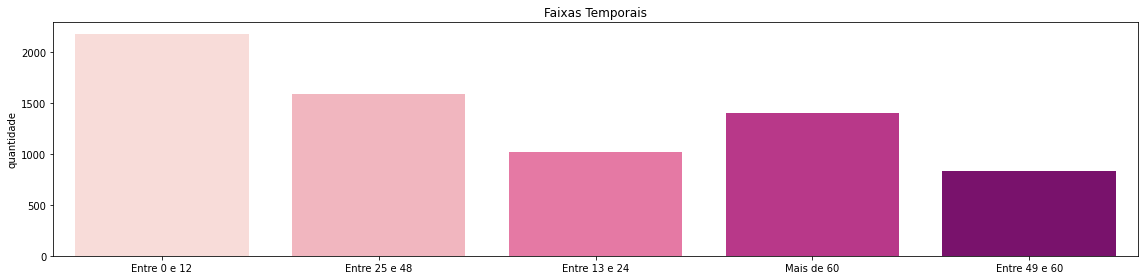

In [24]:
fig, ax = plt.subplots(figsize=(16,4))
sns.countplot(x=df_clean['contract_faixa'], ax=ax, palette='RdPu')
ax.set_xticklabels(('Entre 0 e 12', 'Entre 25 e 48', 'Entre 13 e 24', 'Mais de 60', 'Entre 49 e 60'))
ax.set_xlabel('')
ax.set_title('Faixas Temporais')
ax.set_ylabel('quantidade')
fig.tight_layout()


Plotagem do gráfico de barras da quantidade de cliente que optou por contrato mensal, anual ou de 2 anos.

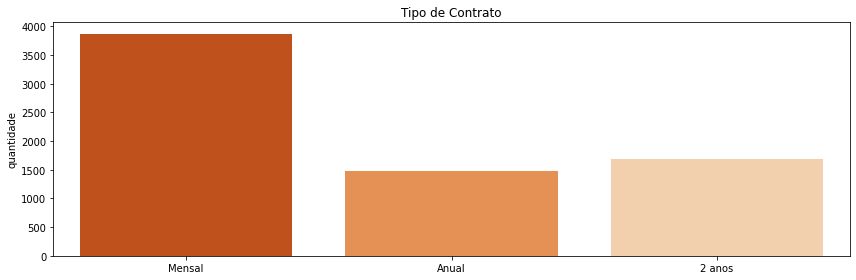

In [25]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x=df_clean['Contract'], ax=ax, palette='Oranges_r')
ax.set_xticklabels(('Mensal', 'Anual', '2 anos'))
ax.set_xlabel('')
ax.set_title('Tipo de Contrato')
ax.set_ylabel('quantidade')
fig.tight_layout()


Plotagem em gráfico de barras das formas de pagamento que o cliente opta. 

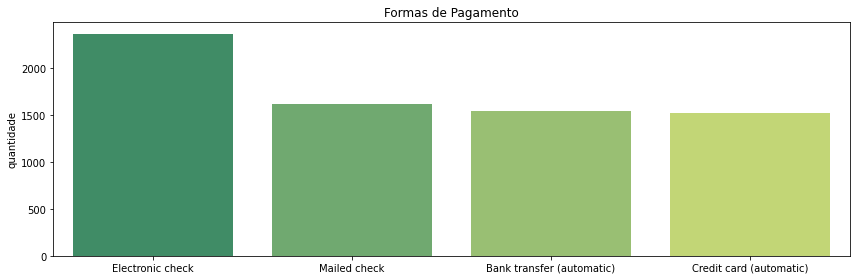

In [26]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x=df_clean['PaymentMethod'], ax=ax, palette='summer')
ax.set_xlabel('')
ax.set_title('Formas de Pagamento')
ax.set_ylabel('quantidade')
fig.tight_layout()

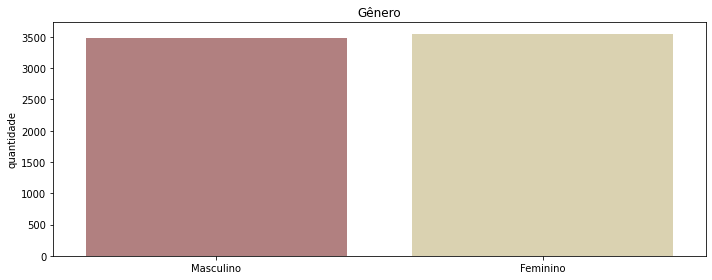

In [27]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x=df_clean['gender'], ax=ax, palette='pink')
ax.set_xticklabels(('Masculino', 'Feminino'))
ax.set_xlabel('')
ax.set_title('Gênero')
ax.set_ylabel('quantidade')
fig.tight_layout()

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

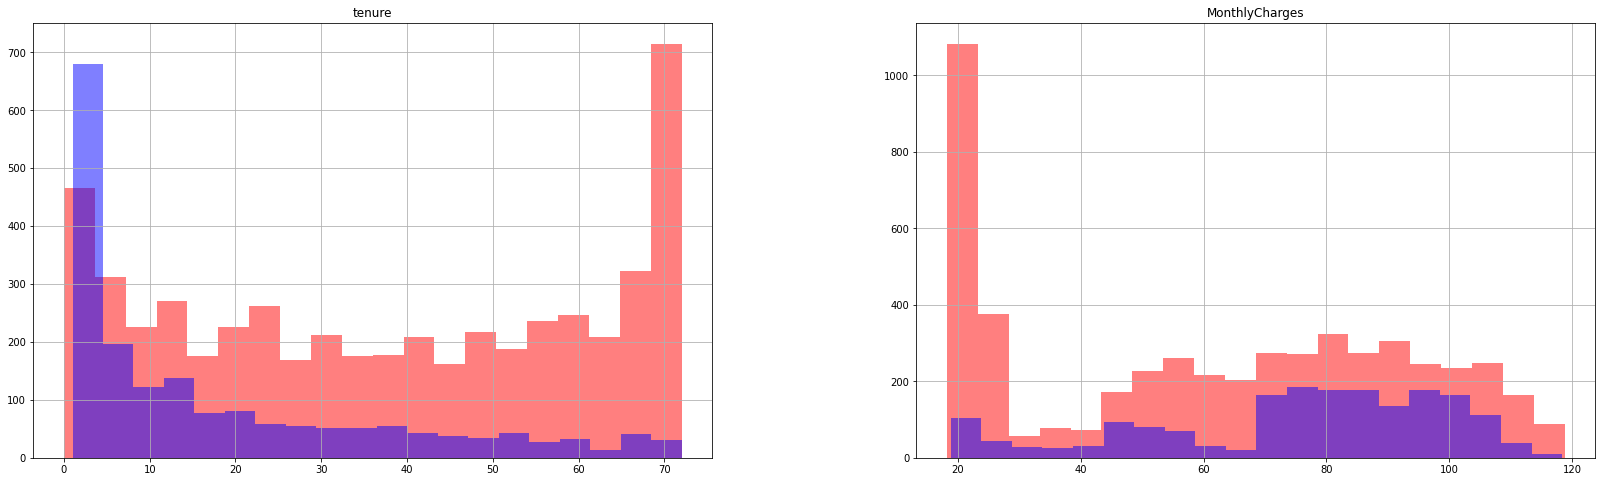

In [28]:
numero_features=['tenure', 'MonthlyCharges']
fig, ax=plt.subplots(1,2, figsize=(28,8))
df_clean[df_clean.Churn=='No'][numero_features].hist(bins=20, color='red', alpha=0.5, ax=ax)
df_clean[df_clean.Churn=='Yes'][numero_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)


Agora vamos finalmente visualizar a porcentagem de churn ou N-churn dos nossos dados de acordo com a feature Churn 

In [29]:
num_retained=df_clean[df_clean.Churn=='No'].shape[0]
num_churned= df_clean[df_clean.Churn=='Yes'].shape[0]
print(num_retained/(num_retained + num_churned) * 100, '% de clientes ainda estão na companhia.')

print(num_churned/(num_churned + num_retained) * 100, '% de clientes que saíram da companhia.')

73.4630129206304 % de clientes ainda estão na companhia.
26.536987079369588 % de clientes que saíram da companhia.


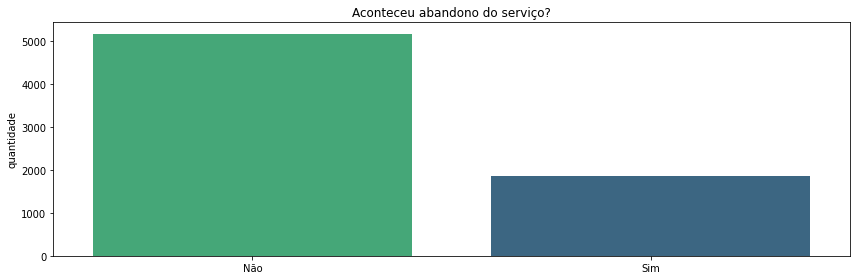

In [30]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x=df_clean['Churn'], ax=ax, palette='viridis_r')
ax.set_xticklabels(('Não', 'Sim'))
ax.set_xlabel('')
ax.set_title('Aconteceu abandono do serviço?')
ax.set_ylabel('quantidade')
fig.tight_layout()

In [31]:
df_clean.loc[df_clean.Churn=='No','Churn'] = 0 
df_clean.loc[df_clean.Churn=='Yes','Churn'] = 1

In [32]:
df_clean["Churn"].value_counts().values

array([5174, 1869], dtype=int64)

In [33]:
df_clean["Churn"]=df_clean["Churn"].astype(int)

In [6]:
# Visualizando a relação entre Tenure e Churn rate
plot_by_tenure = df_clean.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot_by_tenure['tenure'],
        y=plot_by_tenure['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 5,
            line= dict(width=0.8),
            color= 'green'
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Relação entre features Tenure e Churn',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


NameError: name 'df_clean' is not defined

Para ver a tendência entre a tenure e churn,foi construido um gráfico de dispersão. Podemos obeservar que quanto maior o tempo de contrato, menor será o risco do cliente abandonar o serviço.

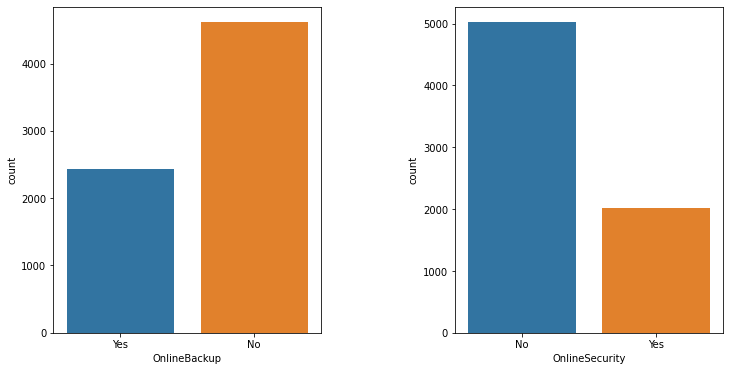

In [35]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plt.subplots_adjust(wspace=.5)
sns.countplot(x=df_clean['OnlineBackup'], ax=ax1)
sns.countplot(x=df_clean['OnlineSecurity'], ax=ax2)
ax1.set_label('Backup Online')
ax2.set_label('Security online')






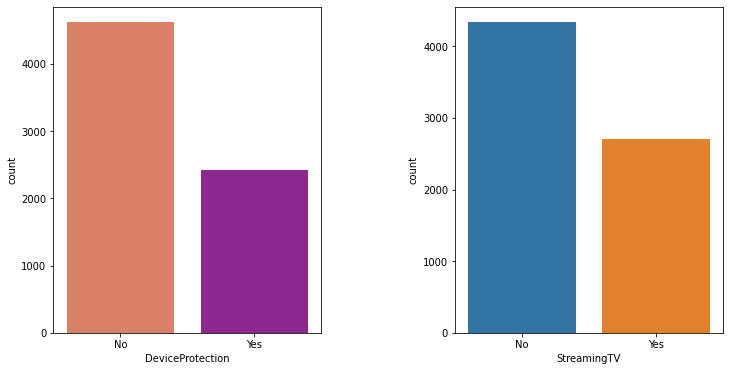

In [36]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plt.subplots_adjust(wspace=.5)
sns.countplot(x=df_clean['DeviceProtection'], ax=ax1, palette='plasma_r')
sns.countplot(x=df_clean['StreamingTV'], ax=ax2)
ax1.set_label('DeviceProtection')
ax2.set_label('Stream TV')

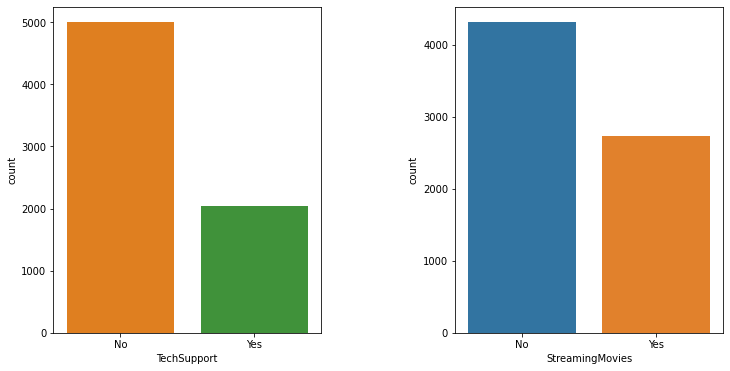

In [37]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plt.subplots_adjust(wspace=.5)
sns.countplot(x=df_clean['TechSupport'], ax=ax1, palette='Paired_r')
sns.countplot(x=df_clean['StreamingMovies'], ax=ax2)
ax1.set_label('Tech Support')
ax2.set_label('Stream Movies')

Depois de analisar todos os resultados do processamento dos dados podemos observar que as distribuíções possuem valores númericos contínuos e distribuições desbalanceadas. Para resolver esse problema vou realizar a normalização de atributos númericos. Essa técnica pode ser utilizada quando o conjunto de dados reais apresenta atributos contínuos que estão espalhados por distintas faixas de valores ou que possuem diferentes variações de valores, e isso se dá pela natureza ou escala em que foram medidas os dados. Para realizar a normalização vou utitlizar a biblioteca do Sklearn MinMaxScaler (Por padrão, o metodo reescala com min=0 e max=1


In [38]:
data_amp=df_clean[['MonthlyCharges', 'tenure', 'TotalCharges']]


In [38]:
data_amp.head(2)

,MonthlyCharges,tenure,TotalCharges
0,29.85,1,29.85
1,56.95,34,1889.50


In [39]:
scalar=MinMaxScaler()
data_minmax=scalar.fit_transform(data_amp)
print('MinMaxScaler aplicado nos dados:\n', data_minmax)


MinMaxScaler aplicado nos dados:
 [[0.11542289 0.01388889 0.0012751 ]
 [0.38507463 0.47222222 0.21586661]
 [0.35422886 0.02777778 0.01031041]
 ...
 [0.11293532 0.15277778 0.03780868]
 [0.55870647 0.05555556 0.03321025]
 [0.86965174 0.91666667 0.78764136]]


# Label Encoding | One-Hot Encoding

Quando o assunto é Label Encoding e One-Hot Encoding já temos em mente a codificação categórica que é um processo de conversão de categorias em números. 

Como já introduzido anteriormente a regressão logística é um método estatístico para prever classes binárias. O resultado ou variável-alvo é dicotômica por natureza. Dicotômico significa que existem apenas duas classes possíveis. E nesse caso é usado para detectar Churn. O modelo calcula a probabilidade dessa ocorrência.

Label Encoding é uma técnica de codificação para lidar com variáveis categóricas. Nesta técnica, cada rótulo é atribuído a um número inteiro exclusivo com base na ordem alfabética.

One-hot Encoding é outra técnica para tratar variáveis categóricas. São criados recursos adicionais com base no número de valores exclusivos na feature categórica.

In [39]:
binary_cols = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_cols = [a for a in df_clean.select_dtypes(['int', 'float']).columns.tolist() if a not in binary_cols]
categoria_col = [a for a in df_clean.columns.tolist() if a not in binary_cols + num_cols]

In [40]:
df_change = df_clean.copy()

lblencoder = LabelEncoder()
for i in binary_cols:
    df_change[i] = lblencoder.fit_transform(df_change[i])
    
df_change = pd.get_dummies(df_change, columns = categoria_col)

In [41]:
df_change.head()

,customerID,gender,Partner,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,tenure_68,tenure_69,tenure_70,tenure_71,tenure_72,contract_faixa_contract_0-12,contract_faixa_contract_13-24,contract_faixa_contract_25-48,contract_faixa_contract_49-60,contract_faixa_contract_60
0,4269,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3548,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3953,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,227,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6806,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Vou realizar a plotagem de uma matriz de confusão para ver a relação entre cada feature nos dados numéricos, para isso vou usar a função Heatmap() do seaborn.
A matriz de confusão ofere uma visão digamos que holística do desempenho do modelo. 

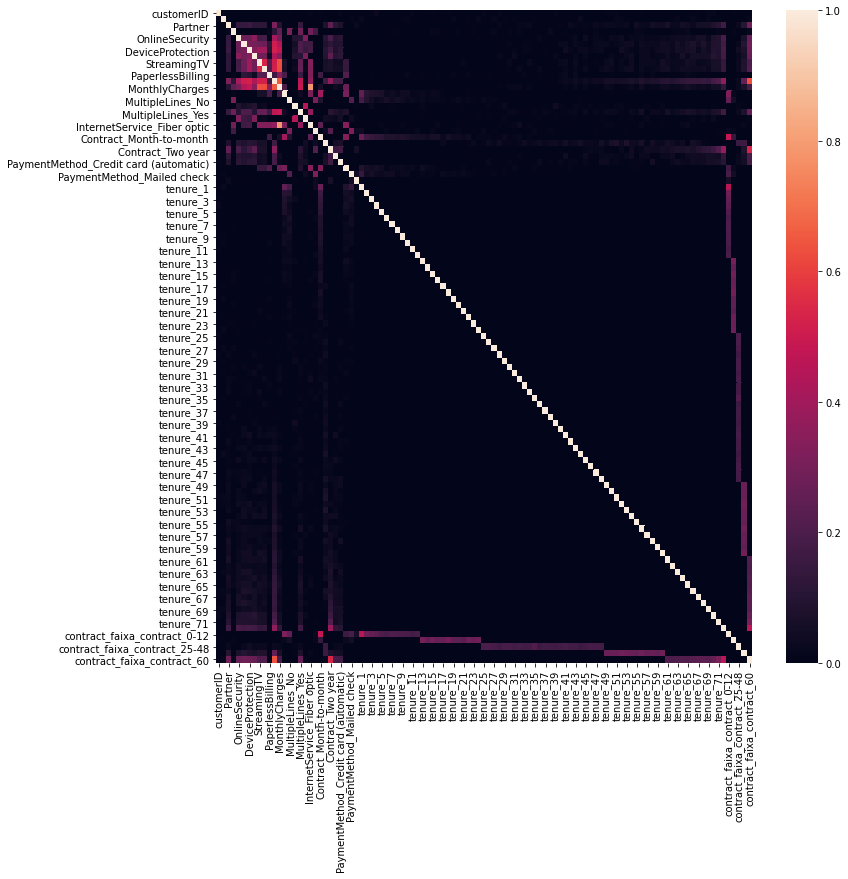

In [43]:
fig, ax=plt.subplots(figsize=(12,12))
sns.heatmap(df_change.corr(), vmin=0, ax=ax)
plt.show()

# Construção do Modelo ML - Churn Rate

Na construção de um modelo de ML temos que ter em mente que apenas ajustar os nossos dados de treino não é o suficiente para se ter o aprendizado de máquina. Com base nessa afirmação vem a tona a seguinte pergunta. Como pode confiar que o modelo também fará boas previsões de modelos nunca vistos?

O objetivo é generalizar para dados que não foram vistos antes. Para realizar isso existem algumas técnicas que podem ser usadas para identificar se o modelo é realmente eficiente. É feito a medição do desempenho de generalização: medimos o seu desempenho num teste realizado com um conjunto de dados que não foram vistos antes.

Isto é de suma importância, pois é através desses testes que podemos identificar se houve overfitting. O overfitting acontece quando o algoritmo funciona bem no conjunto de dados de treinamento, mas tem péssimos resultados no conjunto de dados de teste, logo podemos observar que o algoritmo não pode realizar a generalização.

Uma maneira simples de medir a generalização de um conjunto de dados é dividi-los em três subconjuntos, que são:

- Um conjunto de treinamento, um subconjunto de dados que é usado para treinar o modelo;

- Um conjunto de validação, que é usado para ajustar hiperparâmetros como o número de unidades ocultas ou a taxa de aprendizagem;

- Um conjunto de teste, que é usado para medir o desempenho de generalização.

Uma observação importante é que jamais devemos treinar o conjunto de dados de teste. Pois, isso dará resultados irreais sobre a qualidade do modelo.

Quanto maior for o conjunto de teste, mais confiança temos nas nossas métricas de avaliação, logo teremos intervalos de confiança mais estreitos.

O conjunto de teste precisa atender às seguintes necessidades a seguir:

1. É grande o suficiente para produzir resultados estatisticamente significativos.

2. É representativo o suficiente com o conjunto de dados na totalidade, ou seja, não podemos escolher um conjunto de teste com características diferentes dos nossos dados de treinamento.

Com base nos esclarecimentos prestado acima, vou realizar a separação dos dados de treino e de teste, e começar a construção do nosso modelo de ChurnRate. Com a análise feita sobre esse problema em específico vou usar uma métrica de avaliação que se chama "Recall". Escolhi essa métrica pois claramente podemos notar que o nosso problema é da categoria de classificação desiquilibrada, se comparando o número de clientes que cometeram "churn" como o número de cliente que ainda não cometeu "churn". Partindo desta premissa sabemos que precisão não é uma boa medida para avaliar o desempenho do modelo.

O recall é a capacidade de um modelo de localizar todos os casos relevantes em um conjunto de dados. O recall vai me dá a proporção de positivos reais que foram identificados corretamente, o mesmo possuí a seguinte formula: Recall=TP/TP+FN temos o número de verdadeiros positivos sobre verdadeiros positivos mais falsos negativos.

Os verdadeiros positivos são pontos de dados classificados como positivos pelo modelo que são realmente positivos (o que significa que estão corretos) e os falsos negativos são pontos de dados que o modelo identifica como negativos que na verdade são positivos (incorretos).

In [42]:
#Excluindo e separando a coluna 'Churn' das demaisy = churn_dataset['Churn']
X = df_change.drop(['Churn','customerID'], axis = 1)
y = df_change['Churn']

A distribuição dos dados em conjuntos de treino e teste, pode ser uma divisão de 80-20 ou 72-25 por exemplo, entre outras. O que temos que levar em consideração quando for tomar essa decisão é a nossa quantidade de dados.

para realizar a divisão dos dados vou utilizar a função sklearn.model_selection.train_test_split é uma função que divide arrays ou matrizes em subconjunto de treino e teste de forma aleatória. Nesta função vou passar três parâmetros que serão essenciais para realizar a divisão dos dados.

- shuffle: Esse parâmetro foi escolhido com base em alguns conceitos essenciais de ML no que se trata em evitar polarização ou padrões nos conjuntos de dados divididos antes de treinar o modelo. O embaralhamento de dados é capaz de melhorar a qualidade do modelo e também o desempenho preditivo.

- stratify: Quer dizer divisão estratificada de treino e teste. Este módulo faz com quer os dados de treino e teste fiquem com as mesmas proporções dos exemplos em cada classe, conforme observado no conjunto de dados original.

- random-size: É um parâmetro que dá a garantia que tanto a saída da #Excução1, como a saída #Excecução2 serão iguais. O numero que é atribuído neste parâmetro não importa muito. O importante é que toda vez que você executar o número escolhido, sempre obterá a mesma saída na primeira vez que a divisão for realizada. A escolha do random-size é importante pois se caso não for definido toda vez que modelo for executado, será gerado um novo valor aleatório tanto no conjunto de teste como de treino e isso implica que terão valores diferentes de cada nova iteração.

In [46]:
X_train, X_test, y_train, y_test = train_test=train_test_split(X,y, stratify=y, shuffle=True, \
                                                              test_size=0.2, random_state=44)

# Cross-validation



Na aprendizagem de máquina, não podemos ajustar o modelo aos nossos dados de treinamento e também não conseguimos dizer que o modelo funcionará com a precisão necessária para os dados reais. Diante disso é preciso ter certeza que nosso modelo obteve os padrões corretos de dados, e não está captando algum ruído. Neste modelo optei por avaliar com uma técnica chamada de validação cruzada, conhecida como cross-validation, a mesma é capaz de avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

Nessa técnica o modelo usa o subconjunto de dados e, em seguida, é realizada a avaliação usando o subconjunto complementar ao conjunto de dados.

Etapas que envolvidas na validação cruzada são as seguintes:

1. Reservar alguma parte do conjunto de dados da nossa amostra.
2. Usa o conjunto de dados restantes, treina o modelo.
3. Testa o modelo usando a parte de reserva do conjunto de dados.

Quando a validação cruzada é usada com o (train test split) temos algumas vantagens que são consideradas de suma importância no momento de avaliação e principalmente faz com que o modelo seja simples.

Vantagens da validação cruzada:

- Estimativa mais precisa da exatidão fora da amostra.
- Uso mais "eficiente" de dados, pois cada observação é usada para treinamento e teste.
- É mais simples examinar os resultados detalhados do processo de teste.

In [47]:
def validar_modelos(X, y, clf, quite = False):
    
    X = np.array(X)
    y = np.array(y)
    
    pipeline = make_pipeline(StandardScaler(), clf)
    val_scores = cross_val_score(pipeline, X, y, scoring = 'recall')
    
    if quite == False:
        print('scores: ', val_scores)
        print('Recall: {:.2f} (+/- {:.2f})'.format(val_scores.mean(), val_scores.std()))
        
    return val_scores.mean()

# Random Forest

Para a primeira validação optei por usar o RF (Random Forest), sem ajuste de parâmentros inicialmente e ver qual o resultado de recall posso obter.

Random Forest é um algoritmo de aprendizagem de máquina supervisionado, simples e fácil de usar. Escolhi este algoritmo a principio pelo fato de ser um dos mais utilizados quando se trata de problemas de classificação e regressão logística.

Random Forest é capaz de construí um conjunto de árvores de decisão, geralmente treinadas com o método de "ensacamento". Quando são adicionados os hiperparâmetros no algoritmo Random Forest o algoritmo se torna ainda mais poderoso, capaz de aumentar o poder preditivo e aumentar a velocidade do modelo. Abaixo estão enumerados 4 passos que explica como o RF funciona na prática.

1. Criação do Bootstraped Dataset.
2. A cada passo é selecionado um número N de features para montar a árvore.
3. Diversas ávores são criadas a partir de subconjuntos diferentes.
4. A instância de teste deve percorrer cada árvore da floresta e a classe definida será a mais votada.

Além também de possuir vantagens que são:

- Maior robustez;

- Menos propenso a sofrer Overfitting em comparação com uma única Árvore de decisão;

- Permite descorberta de conhecimento;

- Poucos parâmetros para ser ajustado;




In [48]:
rf = RandomForestClassifier()
score_baseline = validar_modelos(X_train, y_train, rf)

#A explicação segue abaixo

scores:  [0.5083612  0.50167224 0.45150502 0.43478261 0.43143813]
Recall: 0.47 (+/- 0.03)


# Random UnderSampler

Antes de fazer a ánalise deste  resultado precisamos entender algumas formas que ML usa para validar um modelo. Essas técnicas são extremamente crucial. 

Classes desequilibradas ocorrem comumente em conjuntos de dados e, quando se trata de alguns usos espercificados, é interessante dar mais importância às metricas de precisão e recall, e também como obter o equilíbrio entre elas. 

Em ML existe três formas principais de se avaliar totalmente a eficácia de um modelo.

1. Accuracy- É  a razão entre o número de previsões corretas e o número total de amostras de entrada. 



2. Precision: Procura responder a seguinte questão: Qual a proporção de identificações positivas estavam realmente certa. Para encontrar a precisão de um modelo é realizado um calculo no qual apresenta a seguinte formula: Precision = verdadeiros Positivos/verdadeiros positivos + falso positivo. Como podemos observar é um calculo que leva também em consideração quando o modelo classifica falsos positivos


3. Recall- Procura responder a seguinte questão: Qual a proporção de positivos reais foi identificada corretamente? Para encontrar o recall é usado a seguinte formula: recall=verdadeiros Positivos/verdadeiros positivos + falso negativo. Nesta formula podemos observar que apenas é levado em consideração se ocorreu falso negativo e verdadeiro positivos.   

No resultado podemos observar que o algoritmo Random Florest sem ajuste de parâmetros obteve o resultado de 0.48 e un desvio padrã de 0.03. Isso significa que este modelo detectou em torno de 48% das vezes que realmente seriam 'Churn'. A confiabilidade dessa informação é de 95%. 

In [49]:
RUS=RandomUnderSampler()
X_train_RUS, y_train_RUS = RUS.fit_sample(X_train, y_train)
y_train_RUS.value_counts()

#A explicação segue abaixo

0    1495
1    1495
Name: Churn, dtype: int64

Como já podemos imaginar o nosso conjunto de dados da nossa tabela "Churn" está desbalanceado, nos gráficos plotados anteriormente vimos que a minoria dos dados da tabela são aqueles que informam quando houve "Churn". E esse padrão no conjunto de dados de treinameno pode influenciar muitos algoritmos de aprendizagem de máquina, levando alguns a ignorar totalmente a classe de dados minoritária. E isso é um problema levando em consideração que é a classe de dados minoritária que nos interessa. 
A tecnica que foi usada para balancear os dados de treino é RandomUnderSampler. 

Podemos observar no output que agora temos a mesma quantidade de 0 e 1 na coluna 'Churn'


# Instânciado modelos de ML 

Com o objetivo de testar os modelos de ML e principalmente analisar seus desempenhos e a partir disso escolher os que apresentarem melhores resultados. Os modelos que vou usar são:

1. Random Forest 

2. SVC 

3. Logistic Regression

4. XGBClassifier

5. SGDClassifier

6. LGMClassifier

7. KNeighborsClassifier

In [50]:

lr = LogisticRegression()
lgbm = LGBMClassifier()
Knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
xgb = XGBClassifier()



model = []
recall = []

# avaliando o desempenho (recall)

for clf in (lr, lgbm, Knn, rf, dt, sgdc, svc,xgb):
    model.append(clf.__class__.__name__)
    recall.append(validar_modelos(X_train_RUS, y_train_RUS, clf, quite = True))
    
pd.DataFrame(data = recall, index = model, columns = ['Recall'])

,Recall
LogisticRegression,0.796656
LGBMClassifier,0.769231
KNeighborsClassifier,0.776589
RandomForestClassifier,0.757191
DecisionTreeClassifier,0.671572
SGDClassifier,0.719064
SVC,0.761873
XGBClassifier,0.751171


# XGBClassifier

Como podemos observar de acordo com os resultados o modelo que obteve melhor desempenho foi o Logistic Regression apresenta o Recall mais alto. Para investigar melhor o Recall e a possibilidade de obter resultados melhores vou optar por usar um outro modelo chamado XGBClassifier.Com o mesmo posso ajustar os parâmetros de uma forma mais sistematica e com isso obter melhores resultados. 

O XGBoost: Significa Xtreme Gradient Boosting o mesmo é uma implementação de árvores de decisão com aumento de gradiente projetadas para velocidade e desempenho. 


Esse modelo se torna bastante poderoso pelo fato de possuí uma série de parâmetros que podem ser ajustados e tornar o modelo mais efciciente. 
Nesta implementação vou fazer o ajuste de alguns parâmentros e analisar os resultados aos poucos. Pois o meu objetivo é encontrar um equilibrio entre o overfitting e underfitting e isso só será possível se os parâmentros estiverem bem ajustados.  

O algoritmo foi projetado com o objetivo de redução de tempo de computação e recursos de memória, fazendo com que haja um melhor uso dos recursos para treinar o modelo. Alguns recursos de implementação do algoritmo incluem:

- Sparse Aware: Essa imeplementação faz o tratamento automático de valores de dados perdidos. 


- Block Structure: É usado como um apoio a paralelização de árvores.


- Continued Training: É usado para que se possa impulsionar ainda mais um modelo já ajustado com novos dados. 


In [50]:
#Para conhecer mais alguns parâmetros do XGBClassifier. 

XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=False, verbosity=None)

In [51]:
xgb_model=XGBClassifier ()
xgb_model.fit(X_train_RUS, y_train_RUS)
y_predict = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
#print("A precisão desse modelo é: ", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
pd.crosstab(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



col_0,0,1
Churn,,
0,742,293
1,74,300


Podemos interpretar o relatório acima como se nosso modelo nos dissesse, 52 deles irão se desligar do serviço (precisão de 0,52). E, na verdade, existem cerca de 955 clientes que se desligarão (recall de 0,80). Com base nesses resultados é notório que podemos melhorar o desempenho geral do nosso modelo.

Como podemos observar os resultados são relativamente bons em termos de precison e recall. Temos o nosso F1-score que é a média harmônica de precisão e recall levando ambas as métricas em consideração na seguinte equação: 

- F1= 2 * precision * recall / precision + recall

É usado a média harmônica ao invés da média simples por conta que a mesma é capaz de punir valores extremos. 

Enquanto o recall expressa a habilidade de encontrar todas as instâncias relevantes em um conjunto de dados, a precisão expressa a proporção dos pontos de dados que nosso modelo diz serem relevantes e realmente relevantes.

Como podemos observar temos uma tabela que se chama matriz de confusão, e ela possuí os seguintes valores:


- Verdadeiros positivos: pontos de dados rotulados como positivos que são realmente positivos.
- Falsos positivos: pontos de dados rotulados como positivos que são realmente negativos.
- Negativos verdadeiros: pontos de dados rotulados como negativos que são realmente negativos.
- Falsos negativos: pontos de dados rotulados como negativos que são realmente positivos.



Com o objetivo de entender melhor como o modelo funciona em detalhes, me deparo com as seguintes questões:
1. Primeiro, quais features o modelo usou exatamente no conjunto de dados?
2. Além disso, quais foram as mais importantes?

segue o código abaixo para responder essas questões.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

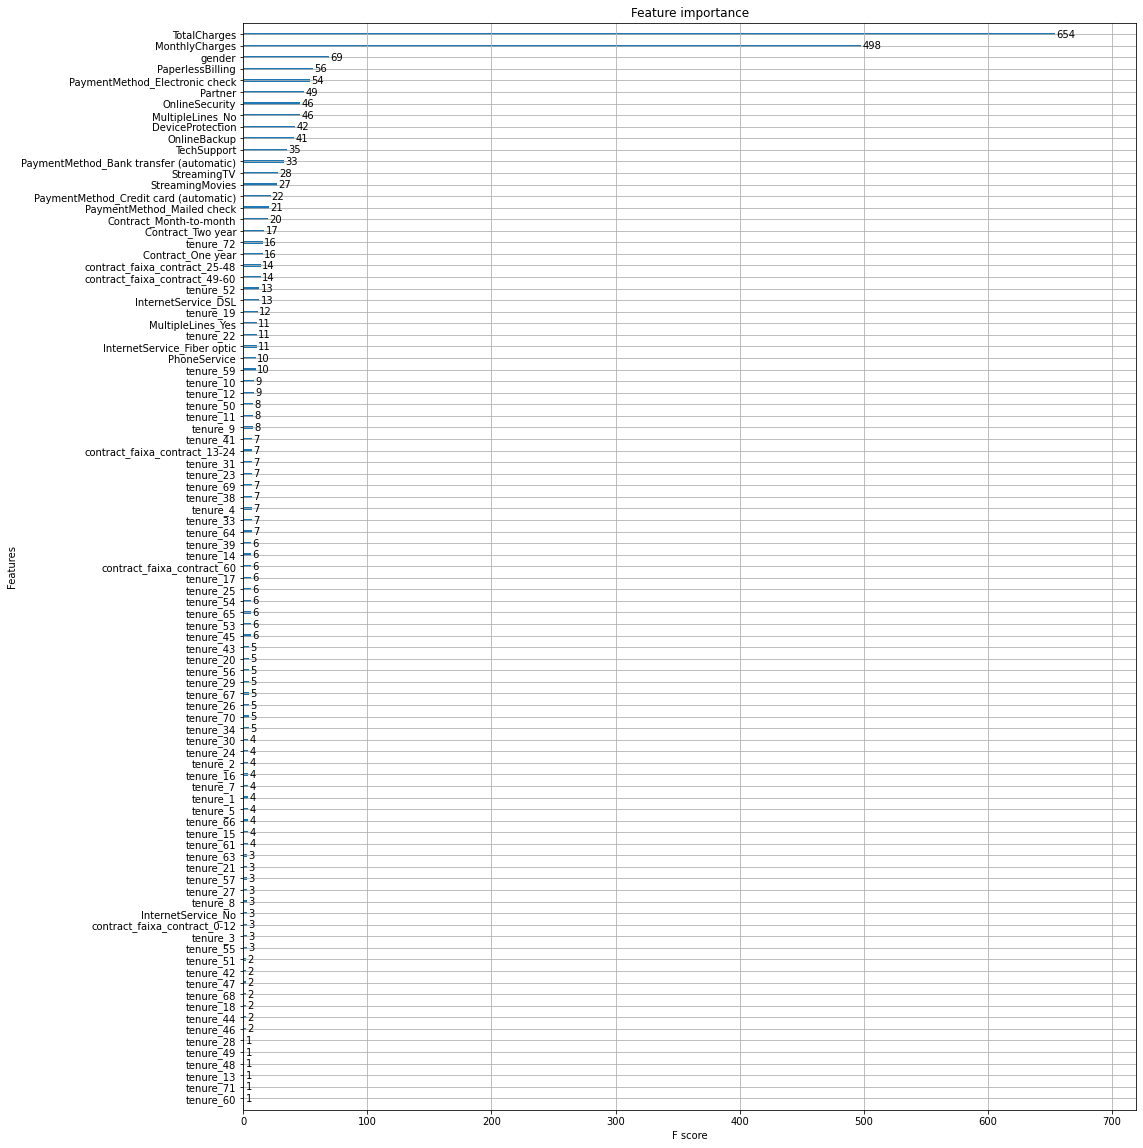

In [54]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(16,20))
plot_importance(xgb_model, ax=ax)

Podemos ver que o modelo atribuiu mais importância a TotalCharges e MonthlyCharges em comparação com as outras features.

# Realizando ajustes de parâmetros

O primeiro parâmetro que vou utilizar é o n_estimators.


n_estimators int, default = 100

O número de estágios de reforço a serem executados. O aumento de gradiente é bastante robusto para sobreajuste, portanto, um número grande geralmente resulta em melhor desempenho.




In [52]:
xgb = XGBClassifier(learning_rate = 0.1)


params = { 'n_estimators' : range(0, 1000, 50), }

# Identificando o melhor parâmentro para n_estimators

kfold = StratifiedKFold(n_splits = 10, shuffle = True)
grid_busca = GridSearchCV(xgb_model, params, scoring = "recall", n_jobs = -1, cv = kfold)
grid_result = grid_busca.fit(X_train_RUS, y_train_RUS)

# vendo os resultados

print("Melhor resultado: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor resultado: 0.7765771812080536 para {'n_estimators': 50}


Como podemos observar obtemos um resultado satisfatório para n_estimators:50. Agora vou realizar o ajuste de mais dois parâmetros que são max_depth e min_child_weight.

O parâmetro de profundidade é uma das maneiras pelas quais podemos regularizar a árvore ou limitar a maneira como ela cresce para evitar o sobreajuste .

- max_depth determina a profundidade máxima da árvore. Em nosso caso, usamos uma profundidade de 1 para fazer nossa árvore de decisão. 

- min_child_weight: é o peso mínimo necessário para criar um novo nó na árvore. Também foi atribuído o valor de 1

Escolhi estes parâmetros para me ajudar a controlar a complexidade das árvores.

In [53]:
xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 50)

params = {
    'max_depth' : range(1, 8, 1),
    'min_child_weight' : range(1, 5, 1)
}

# identificando o melhor parâmetro

kfold = StratifiedKFold(n_splits = 10, shuffle = True)
grid_busca = GridSearchCV(xgb, params, scoring = "recall", n_jobs = -1, cv = kfold)
grid_result = grid_busca.fit(X_train_RUS, y_train_RUS)

# vendo os resultados

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8193736017897091 para {'max_depth': 1, 'min_child_weight': 1}


Apenas com esses sobreajuste conseguimos perceber que os resultados estão ficando cada vez melhor. 


o próximo parâmentro que vou realizar o ajuste é o gamma. O gamma é um parâmetro de regularização. Diferente do max_depth e min_child_weight que faz a regularização usando informação de "dentro da árvore", gamma funciona regularizando informações "entre árvores". Pelo que foi estudado e investigado o gamma ajuda a combater o sobreajuste do modelo e assim evitar o everfitting. 

- Não há gama ideal para um conjunto de dados, há apenas uma gama ótima (com valor real), que depende do conjunto de treinamento e dos outros parâmetros que estão sendo utilizados. 

- É um hiperparâmetro de pseudo-regularização no aumento de gradiente.

- Matematicamente, você chama de “Gama” o “multiplicador de Lagrange” (controle de complexidade).

- Quanto maior for o Gamma, maior será a regularização. O valor padrão é 0 (sem regularização).

In [54]:
xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 50, 
                    max_depth= 1,min_child_weight = 1)

params = {
    'gama' : [i / 10.0 for i in range(0, 5)]
   
}

kfold = StratifiedKFold(n_splits = 10, shuffle = True)
grid_busca = GridSearchCV(xgb, params, scoring = "recall", n_jobs = -1, cv = kfold)
grid_result = grid_busca.fit(X_train_RUS, y_train_RUS)

# vendo os resultados

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))




Melhor: 0.8186979865771813 para {'gama': 0.0}


Como podemos observar os resultados continuam sendo promissores, agora é o momento de encontrar uma melhor taxa de aprendizagem. 

Um problema nas árvores de decisão com aumento de gradiente é que elas aprendem rapidamente e ajustam demais os dados de treinamento. E uma maneira para contornar isso é regular a taxa de aprendizagem. 

A taxa de aprendizagem é um hiperparâmetro importante que controla o quanto ajustamos os pesos na "rede" de acordo com o gradiente. O meu objetivo é encontrar um valor para a taxa de aprendizagem que desacelere o aprendizado no modelo de aumento de gradiente. 

In [55]:
xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 50, 
                    max_depth= 1,min_child_weight = 1, gama=0)

params = {
    'learning_rate' : [0.001, 0.01, 0.1, 1]
   
}

kfold = StratifiedKFold(n_splits = 10, shuffle = True)
grid_busca = GridSearchCV(xgb, params, scoring = "recall", n_jobs = -1, cv = kfold)
grid_result = grid_busca.fit(X_train_RUS, y_train_RUS)

# vendo os resultados

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))




Melhor: 0.8829217002237136 para {'learning_rate': 0.001}


Agora que todos os parâmetros necessarios foram identificados, e os resultados apontaram sempre para um "Recal" mais alto, Vou realizar a predição utilizando o modelo que obtivemos os melhores resultados e criar uma nova coluna chamada 'Probability_of_Churn' para informar qual a probabilidade dos clientes abondonar o serviço.  


In [56]:
xgb = XGBClassifier(learning_rate = 0.001, n_estimators = 50, max_depth = 1, min_child_weight = 1, gamma = 0.0)
xgb.fit(X_train_RUS, y_train_RUS)

# fazendo a predição
y_pred = xgb.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))
pd.crosstab(y_test, y_predict)

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1035
           1       0.43      0.90      0.58       374

    accuracy                           0.66      1409
   macro avg       0.68      0.73      0.64      1409
weighted avg       0.80      0.66      0.67      1409



col_0,0,1
Churn,,
0,764,271
1,76,298


In [58]:
df_change['Probability_of_Churn'] = xgb.predict_proba(df_change[X_test.columns])[:,1]

In [59]:
df_change[['customerID','Probability_of_Churn']].head(12)

,customerID,Probability_of_Churn
0,5704,0.50882
1,6889,0.48378
2,7030,0.50882
3,5467,0.48378
4,2099,0.50882
5,965,0.50882
6,754,0.50882
7,1647,0.50882
8,3271,0.50882
9,3971,0.48378
